In [7]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output


def label_images(folder_path, csv_file):
    # Check if the CSV file exists, if not create a new DataFrame
    if os.path.exists(csv_file):
        df = pd.read_csv(csv_file)
    else:
        df = pd.DataFrame(columns=['Image_Path', 'Label'])

    # Create a plot window
    fig, ax = plt.subplots(figsize=(1,1))
    names = set(map(lambda x: Path(x).name, df['Image_Path']))
    # Iterate through each image in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            img_name = Path(image_path).name
            clear_output(wait=True)
            # Check if the image path already exists in the DataFrame
            if image_path not in df['Image_Path'].values:
                # Clear the previous image
                # plt.clf()
                # ax.clear()
                # Load and display the image
                img = plt.imread(image_path)
                plt.imshow(img, cmap='gray')
                plt.axis('off')
                plt.show()
                # plt.clf()
                # plt.close()
                # Prompt user for label
                label = input("Enter label for image {} (0 or 1): ".format(filename))
                if label == 'q':
                    break
                elif label == '':
                    continue
                # Append image path and label to the DataFrame
                df = pd.concat([df, pd.DataFrame({'Image_Path': [image_path], 'Label': [int(label)]})], ignore_index=True)
                

    df.to_csv(csv_file, index=False)

    print("Labels appended and saved to", csv_file)

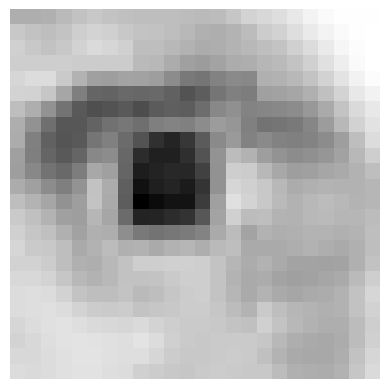

Labels appended and saved to ./image_labels.csv


In [15]:
# Example usage
folder_path = './EyesDataset/'
csv_file = './image_labels.csv'
label_images(folder_path, csv_file)
